<a target="_blank" href="https://colab.research.google.com/github/starccato/starccato/blob/main/docs/training.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Training

This demonstrates our training  process for a Generative Adversarial Network (GAN) to generate stellar core collapse signals. The GAN is trained on a dataset of 1764 stellar core collapse signals, each with 256 timestamps.



In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
! pip install starccato -q


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


## Load training data

In [10]:
from starccato.training.training_data import TrainingData

training_data = TrainingData()
training_data.summary()

2024-05-15 16:53:08.633 | INFO     | starccato.training.training_data:summary:183 - Signal Dataset mean: -0.516 +/- 39.724
Signal Dataset scaling factor (to match noise in generator): 5
Signal Dataset shape: (256, 1684)



```
Signal Dataset mean: -0.516 +/- 39.724
Signal Dataset scaling factor (to match noise in generator): 5
Signal Dataset shape: (256, 1684)
```

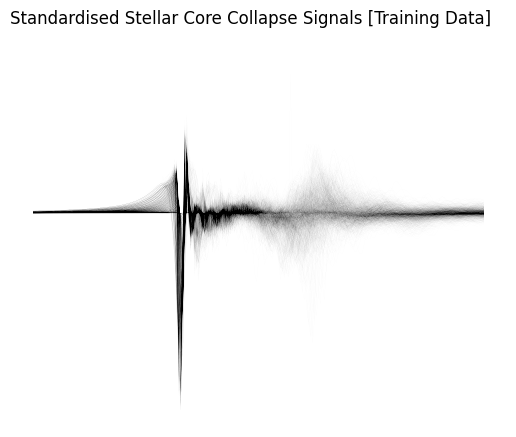

In [11]:
from starccato.plotting import overplot_signals

signals = training_data.standardize(training_data.raw_signals)[:, 130:-50]
fig = overplot_signals(signals, color="k", alpha=0.01, linewidth=0.2)
fig.axes[0].set_axis_off()
fig.axes[0].grid(False)
_ = fig.suptitle("Standardised Stellar Core Collapse Signals [Training Data]")

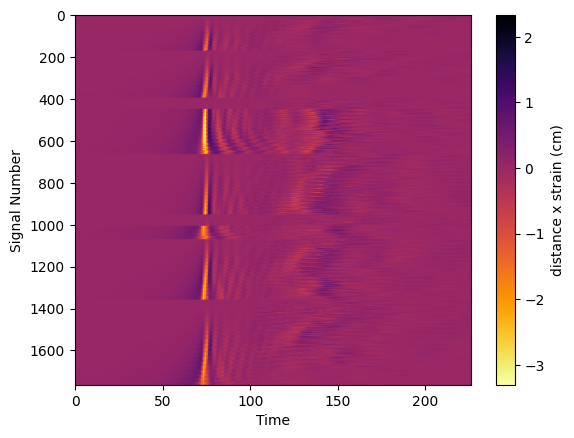

In [12]:
from starccato.plotting import plot_stacked_signals

fig = plot_stacked_signals(signals, norm="linear", cmap="inferno_r")

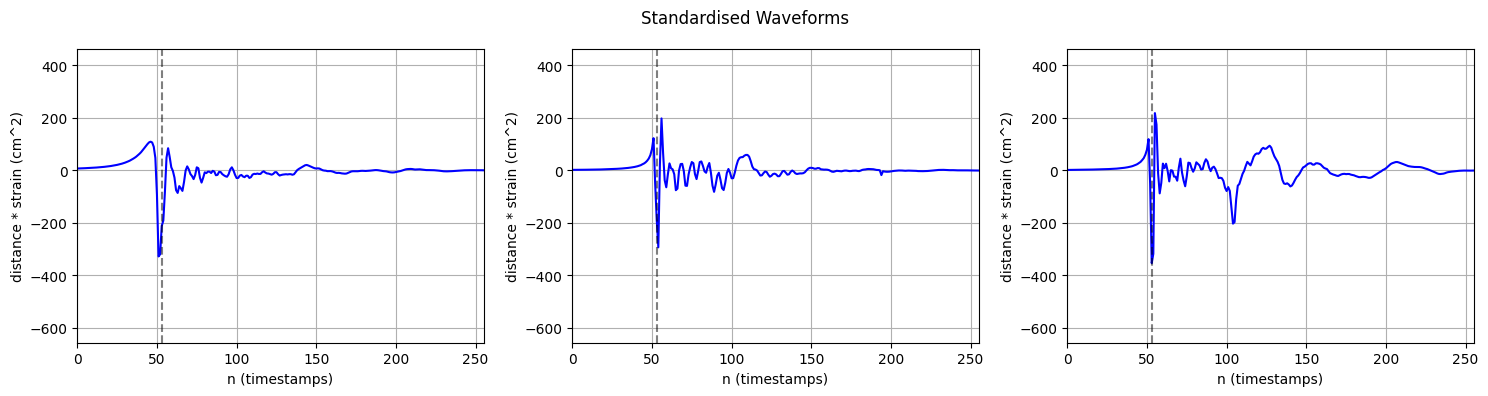

In [13]:
fig, axes = training_data.plot_waveforms(standardised=True)

## Train GAN and discriminator models

For details on the model, see the [model architecture](https://github.com/tarin-e/starccato/tree/main/src/starccato/nn).

For details on the training, see the [training code](https://github.com/tarin-e/starccato/blob/main/src/starccato/training/trainer.py).


/Users/tarineccleston/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


2024-05-15 16:53:14.751 | INFO     | starccato.training.trainer:train:118 - 
Starting Training Loop [Epochs: 8, Train Size: (256, 1684), Learning Rate: (2e-05, 2e-05)]


Epochs:   0%|          | 0/8 [00:00<?, ?it/s]

Batch:   0%|          | 0/53 [00:00<?, ?it/s]

/Users/tarineccleston/Library/Python/3.9/lib/python/site-packages/starccato/plotting.py:92: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/Users/tarineccleston/Library/Python/3.9/lib/python/site-packages/starccato/plotting.py:92: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tarineccleston/Library/Python/3.9/lib/python/site-packages/starccato/plotting.py:120: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/Users/tarineccleston/Library/Python/3.9/lib/python/site-packages/starccato/plotting.py:120: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tarineccleston/Library/Python/3.9/lib/python/site-packages/starccato/training/trainer.py:276: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough 

Batch:   0%|          | 0/53 [00:00<?, ?it/s]

Batch:   0%|          | 0/53 [00:00<?, ?it/s]

Batch:   0%|          | 0/53 [00:00<?, ?it/s]

Batch:   0%|          | 0/53 [00:00<?, ?it/s]

Batch:   0%|          | 0/53 [00:00<?, ?it/s]

Batch:   0%|          | 0/53 [00:00<?, ?it/s]

Batch:   0%|          | 0/53 [00:00<?, ?it/s]

2024-05-15 16:56:36.204 | INFO     | starccato.training.trainer:train:174 - Training Time: 3.36min
2024-05-15 16:56:38.610 | INFO     | starccato.training.trainer:save_models:187 - Saved model to outdir/generator_weights.pt


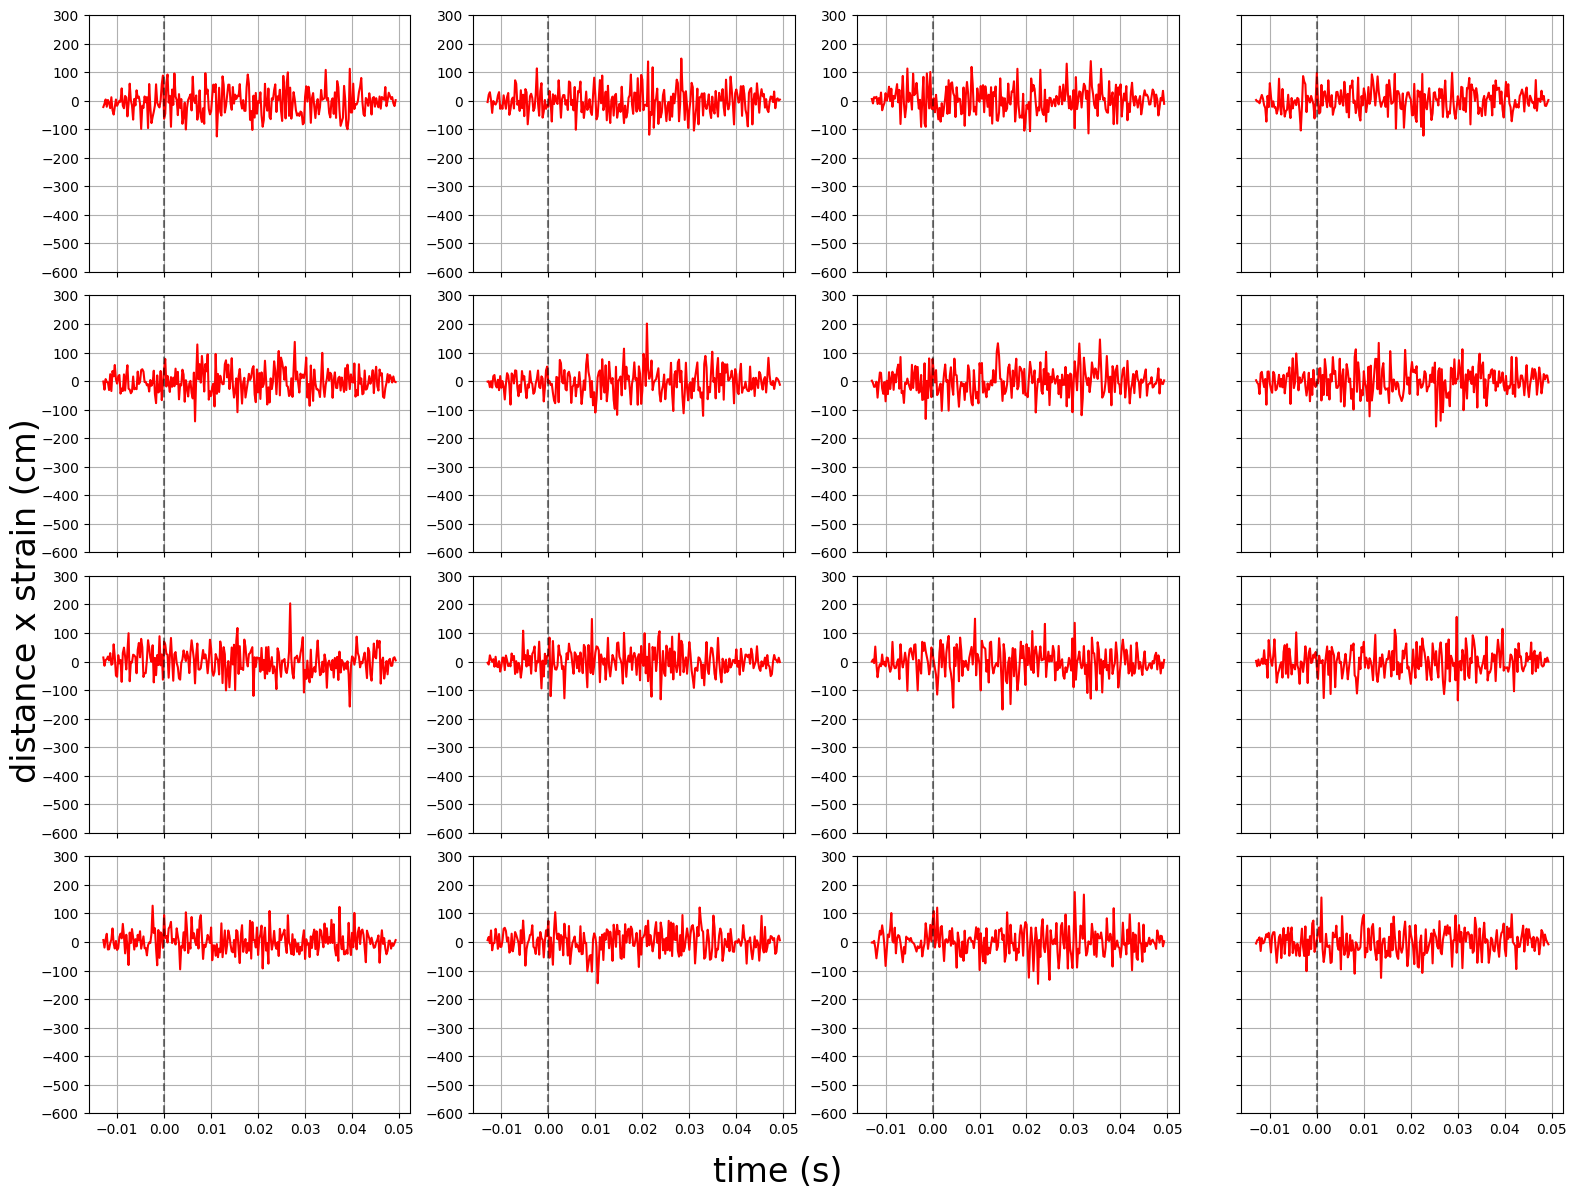

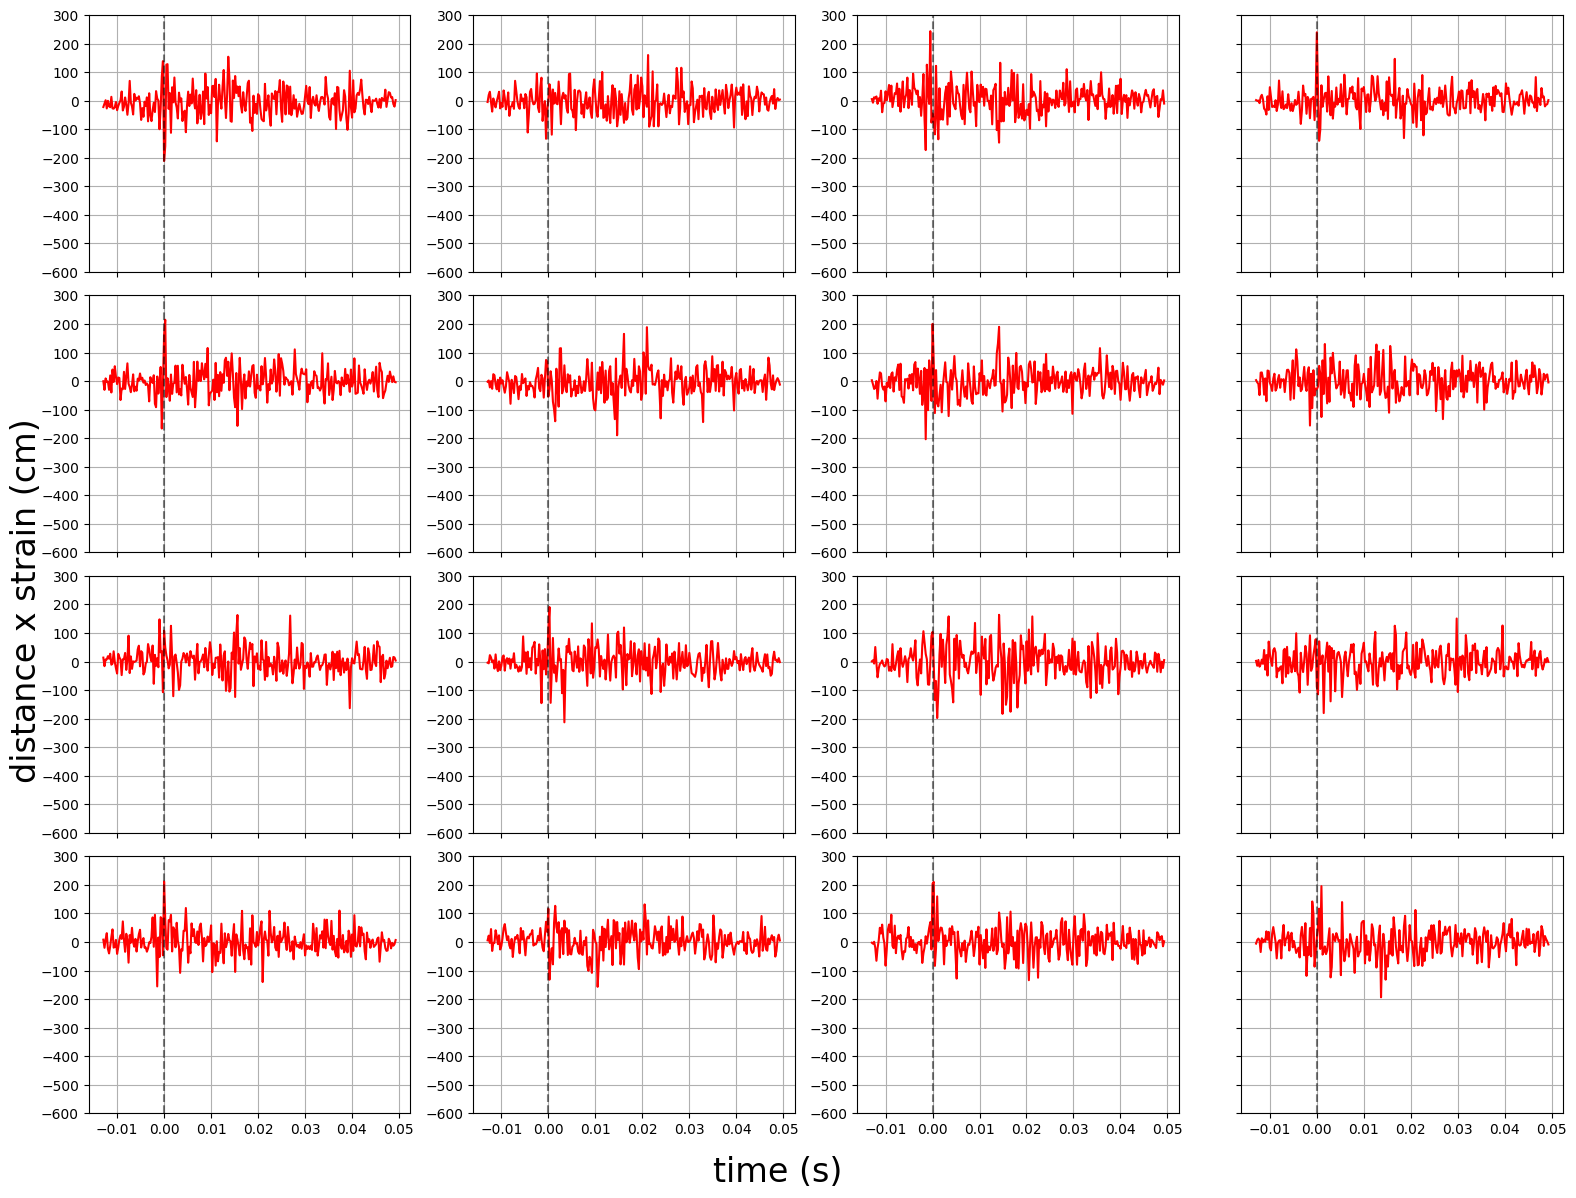

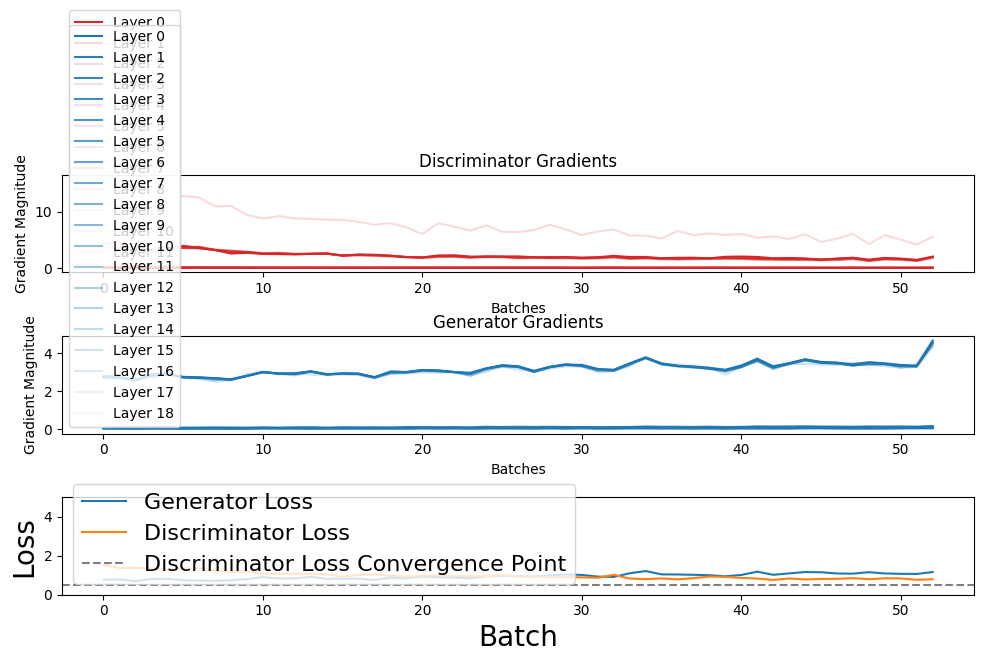

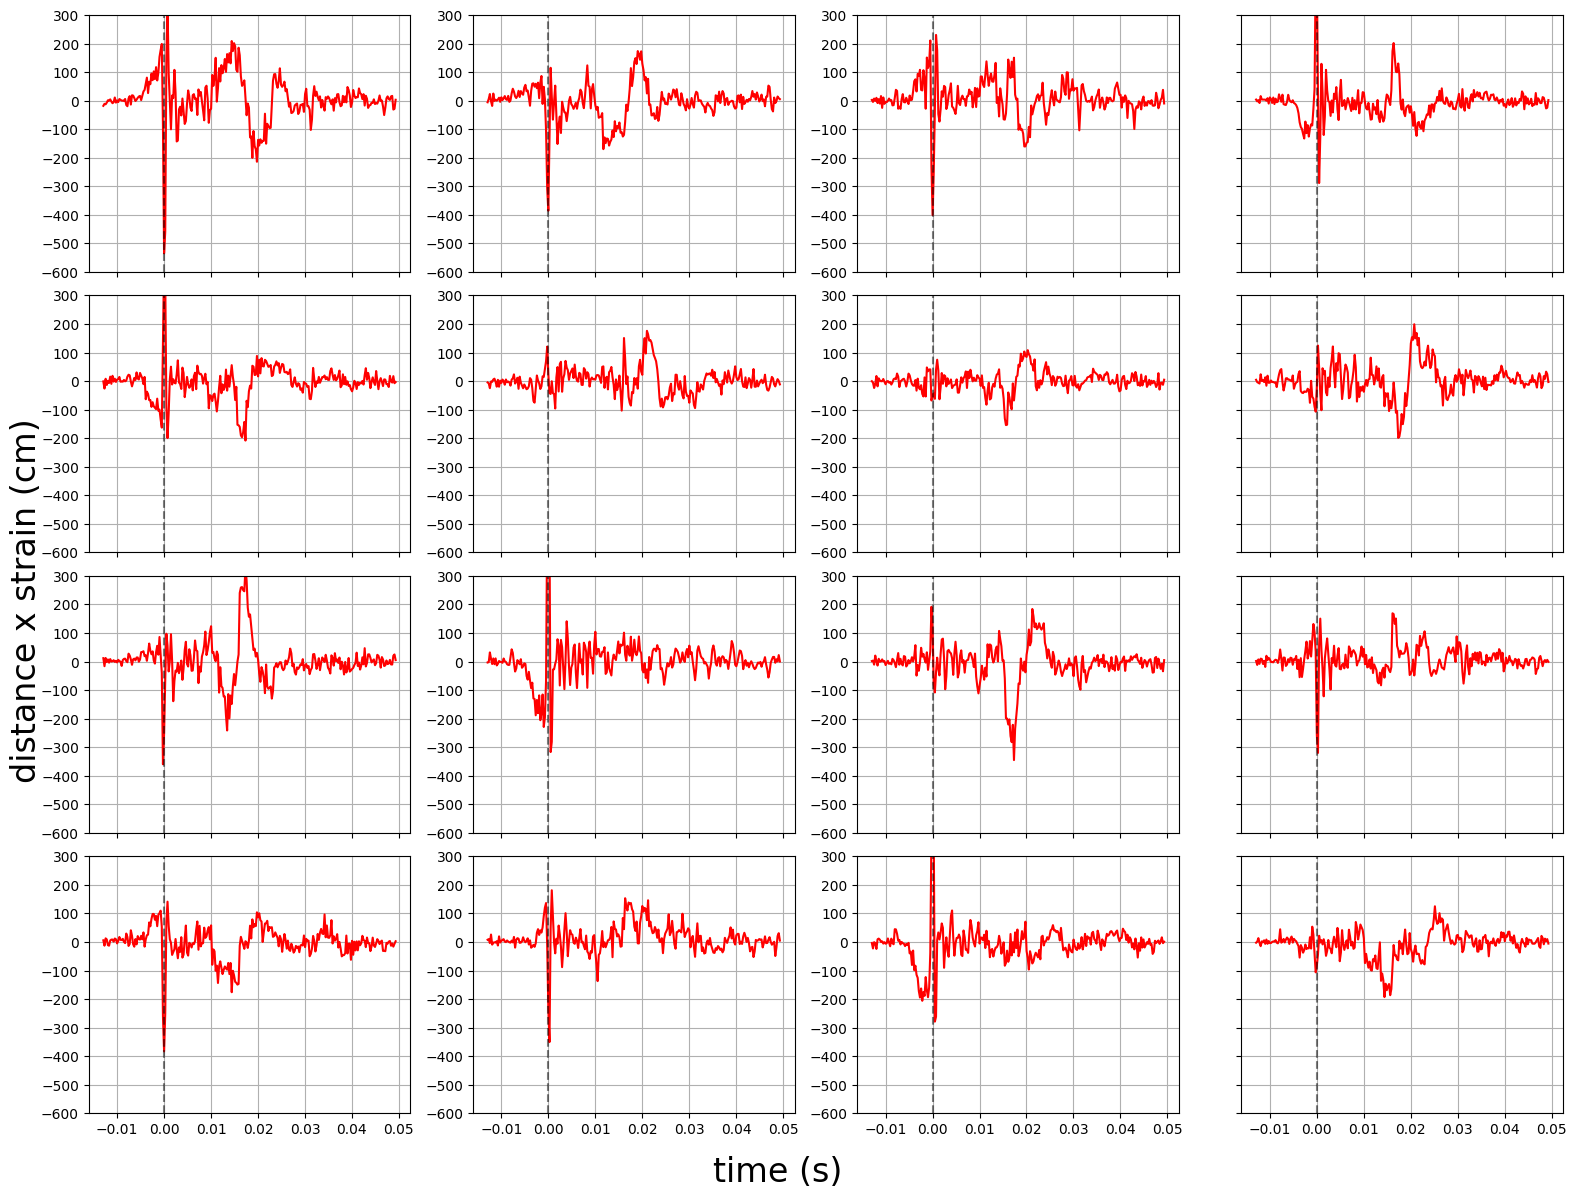

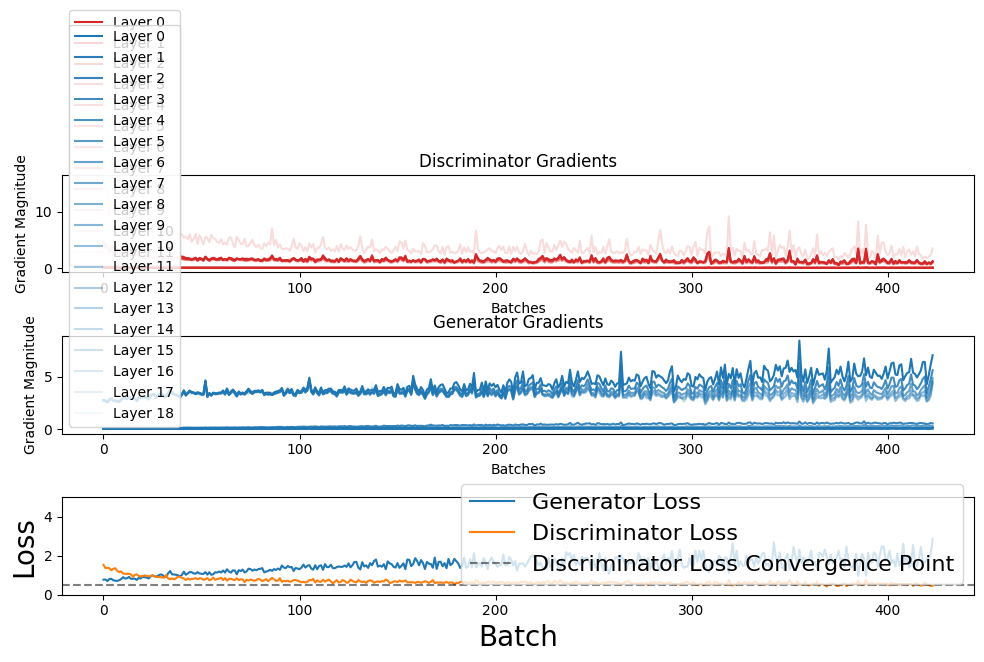

In [14]:
from starccato.training import train

result = train(num_epochs=8)

## Plots

### Signals
![Signals][signals_end]

### Training Loss plot
![Losses][losses]

### Gradients
| Generator Gradients | Discriminator Gradients |
|---------------------|-------------------------|
| ![Generator Gradients][gen_grads] | ![Discriminator Gradients][disc_grads] |


[gen_grads]: outdir/generator_gradients.png
[disc_grads]: outdir/discriminator_gradients.png
[losses]: outdir/losses.png
[signals_end]: outdir/signals_epoch_128.png


